more than two classes so selecting two classes for now
more than two classes so selecting two classes for now
Accuracy of NN classifier (k = 1)
 1.0
Accuracy of kNN classifier (k = 3)
 0.9166666666666666


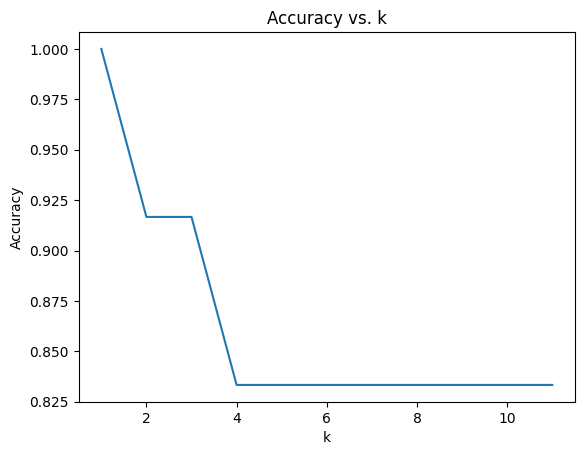

In [58]:
# A8 Make k = 1 to implement NN classifier and compare the results with kNN (k = 3).

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_excel("/content/TRAINING_DATA.xlsx")

y = df.iloc[:, -1]
X = df.iloc[:, :-1]

if y.dtype != object:
    le = LabelEncoder()
    le.fit(y)
    y = le.transform(y)

classes = np.unique(y)
if len(classes) > 2:
    print("more than two classes so selecting two classes for now")
    class1, class2 = classes[0], classes[1]
    X = X[(y == class1) | (y == class2)]
    y = y[(y == class1) | (y == class2)]


df_test = pd.read_excel("/content/TRAINING_DATA.xlsx")
y_test = df_test.iloc[:, -1]
X_test = df_test.iloc[:, :-1]

if y_test.dtype != object:
    le = LabelEncoder()
    le.fit(y_test)
    y_test = le.transform(y_test)

classes = np.unique(y_test)
if len(classes) > 2:
    print("more than two classes so selecting two classes for now")
    class1, class2 = classes[0], classes[1]
    X_test = X_test[(y_test == class1) | (y_test == class2)]
    y_test = y_test[(y_test == class1) | (y_test == class2)]

# Implement NN classifier (k = 1)
neigh_nn = KNeighborsClassifier(n_neighbors=1)
neigh_nn.fit(X, y)
prediction_nn = neigh_nn.predict(X_test)
accuracy_nn = accuracy_score(y_test, prediction_nn)
print("Accuracy of NN classifier (k = 1)\n", accuracy_nn)

# Implement kNN classifier (k = 3)
neigh_knn = KNeighborsClassifier(n_neighbors=3)
neigh_knn.fit(X, y)
prediction_knn = neigh_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, prediction_knn)
print("Accuracy of kNN classifier (k = 3)\n", accuracy_knn)

# Vary k from 1 to 11 and make an accuracy plot
k_values = range(1, 12)
accuracies = []
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X, y)
    prediction = neigh.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k")
plt.show()